## Proyecto Peleas UFC

### Unidades de observación 
Las peleas de los diferentes eventos realizados por UFC desde 1994 hasta 2021

### Unidad de análisis
Análitica y descriptiva principalmente, aunque también se busca ver las posibilidades de una unidad predictiva (digamos para crear un modelo predictivo de resultados)
### Justificación de datos
Nuestros datos longitudinales ya que tienen "resultados repetitivos" a lo largo del tiempo  
También porque en varias ocasiones a los sujetos les aplican las mismas mediciones

### clasificación de variables/columnas

FIGHT_ID – Nominal  
EVENT_ID – Nominal  
FIGHT_NAME – Nominal  
FIGHT_WEIGHTCLASS – Nominal  
FIGHT_METHOD – Nominal  
ROUND – Ordinal  
TIME – Intervalo  
FIGHT_TIME_FORMAT – Nominal  
FIGHT_REFEREE – Nominal  
FIGHT_DETAILS – Nominal  
MINUTE - Razón  
SECOND - Razón  
FIGHT_STUB, EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL – Nominal  
FIGHT_WINNER – Nominal 

## Alta - Baja Cardinalidad (Nominales)

FIGHT - Alta

EVENT - Alta 

FightWeight - Baja

FightMethod - Alta

FightTimeFormat - Baja

Fight_Referee - Baja

Fight_Details - Alta

Fight_Winner - Alta

FIGHT_STUB EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL – Alta 

FIGHT_WINNER – Alta

## Categoricos balanceados
Round

## Categoricos no balanceados
FIGHT_ID   
EVENT_ID 
FIGHT_NAME
FIGHT_WEIGHTCLASS 
FIGHT_METHOD  
FIGHT_STUB, EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL 
FIGHT_WINNER 


In [5]:
#Importacion de librerias
import numpy as np
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!jupyter nbextension enable --py widgetsnbextension

'2.0.3'

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [6]:
df = pd.read_csv('ufc-fight-metadata.csv', encoding='utf-8')

In [7]:
df_backup = df.copy()
# df

In [8]:
# Lista de nombres de columnas
col = df.columns
# col

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIGHT_ID           6662 non-null   int64 
 1   EVENT_ID           6662 non-null   int64 
 2   FIGHT_NAME         6662 non-null   object
 3   FIGHT_WEIGHTCLASS  6662 non-null   object
 4   FIGHT_METHOD       6662 non-null   object
 5   ROUND              6662 non-null   int64 
 6   TIME               6662 non-null   object
 7   FIGHT_TIME_FORMAT  6662 non-null   object
 8   FIGHT_REFEREE      6662 non-null   object
 9   FIGHT_DETAILS      6662 non-null   object
 10  MINUTE             6662 non-null   int64 
 11  SECOND             6662 non-null   int64 
 12  FIGHT_STUB         6662 non-null   object
 13  EVENT_NAME         6662 non-null   object
 14  EVENT_DATE         6662 non-null   object
 15  EVENT_LOCATION     6662 non-null   object
 16  EVENT_STUB         6662 non-null   object


In [10]:
nominales = ['FIGHT_ID', 'EVENT_ID', 'FIGHT_NAME','FIGHT_WEIGHTCLASS','FIGHT_METHOD','FIGHT_TIME_FORMAT','FIGHT_REFEREE','FIGHT_DETAILS','FIGHT_STUB','EVENT_NAME','EVENT_DATE','EVENT_LOCATION','EVENT_STUB','DATE_YMD','URL','FIGHT_WINNER']
ordinales = ['ROUND']  # Pudiera considerarse a karno ordinal pues de un médico a otro el número asignado no es lo mismo
intervalo = ['TIME']
razon = ['MINUTE', 'SECOND']

In [11]:
for i in nominales:
    df[i] = df[i].astype('category')
    

In [12]:
for i in nominales + ordinales:
    print(i)
    df[i].unique()
    print()    

FIGHT_ID


[10647, 10651, 10655, 10720, 10724, ..., 15070, 12586, 12587, 13629, 13633]
Length: 6662
Categories (6662, int64): [9532, 9533, 9534, 9535, ..., 16250, 16251, 16252, 16253]


EVENT_ID


[1227, 1233, 1243, 1259, 1261, ..., 1267, 1307, 1366, 1426, 1461]
Length: 614
Categories (614, int64): [1131, 1132, 1133, 1134, ..., 1742, 1743, 1744, 1745]


FIGHT_NAME


['Glover Teixeira v Nikita Krylov', 'Misha Cirkunov v Jimmy Crute', 'Chas Skelly v Jordan Griffin', 'Cristiane Justino v Felicia Spencer', 'Alexis Davis v Viviane Araujo', ..., 'George Sotiropoulos v Roman Mitichyan', 'Chris Kelades v Chris Beal', 'Shane Campbell v Elias Silverio', 'Sam Stout v James Krause', 'Yves Jabouin v Dustin Pague']
Length: 6564
Categories (6564, object): ['AJ Fletcher v Ange Loosa', 'Aalon Cruz v Spike Carlyle', 'Aaron Phillips v Matt Hobar', 'Aaron Riley v Joe Brammer', ..., 'Zhang Weili v Rose Namajunas', 'Zubaira Tukhugov v Ernest Chavez', 'Zubaira Tukhugov v Lerone Murphy', 'Zubaira Tukhugov v Phillipe Nover']


FIGHT_WEIGHTCLASS


['Light Heavyweight', 'Featherweight', 'Women&#039;s Featherweight', 'Women&#039;s Flyweight', 'Women&#039;s Bantamweight', ..., 'Ultimate Fighter 4 Welterweight Tournament Ti..., 'Ultimate Fighter 2 Heavyweight Tournament Title', 'Ultimate Fighter 1 Light Heavyweight Tourname..., 'UFC Interim Flyweight Title', 'Ultimate Fighter Latin America 2 Welterweight...]
Length: 109
Categories (109, object): ['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight', ..., 'Women&#039;s Bantamweight', 'Women&#039;s Featherweight', 'Women&#039;s Flyweight', 'Women&#039;s Strawweight']


FIGHT_METHOD


['Decision - Split', 'Submission', 'Decision - Unanimous', 'KO/TKO', 'TKO - Doctor&#039;s Stoppage', 'Decision - Majority', 'Overturned', 'DQ', 'Could Not Continue', 'Other']
Categories (10, object): ['Could Not Continue', 'DQ', 'Decision - Majority', 'Decision - Split', ..., 'Other', 'Overturned', 'Submission', 'TKO - Doctor&#039;s Stoppage']


FIGHT_TIME_FORMAT


['3 Rnd (5-5-5)', '5 Rnd (5-5-5-5-5)', '3 Rnd + OT (5-5-5-5)', '1 Rnd + OT (12-3)', '1 Rnd (20)', ..., '1 Rnd + OT (30-3)', '1 Rnd (30)', '1 Rnd + OT (31-5)', 'No Time Limit', '1 Rnd (12)']
Length: 19
Categories (19, object): ['1 Rnd (10)', '1 Rnd (12)', '1 Rnd (15)', '1 Rnd (18)', ..., '3 Rnd (5-5-5)', '3 Rnd + OT (5-5-5-5)', '5 Rnd (5-5-5-5-5)', 'No Time Limit']


FIGHT_REFEREE


['Yves Lavigne', 'Wolf Menninger', 'Will Fisher', 'Wernei Cardoso', 'Wayne Spinola', ..., 'Al Wichgers', 'Al Guinee', 'Al Coley', 'Adam Martinez', 'Adam Cheadle']
Length: 208
Categories (208, object): ['Adam Cheadle', 'Adam Martinez', 'Al Coley', 'Al Guinee', ..., 'Wernei Cardoso', 'Will Fisher', 'Wolf Menninger', 'Yves Lavigne']


FIGHT_DETAILS


['Decision - Split', 'Peruvian Necktie On Ground', 'Decision', 'Punches to Head From Mount', 'Rear Naked Choke', ..., 'Illegal Inhaler Use by Hardy                 ..., 'Inverted Triangle From Side Control', 'Failed Drug Test by Munhoz', 'Punches to Head From Bottom Guard', 'Failed Drug Test by Shields                  ...]
Length: 389
Categories (389, object): ['Accidental Eye Poke by O&#039;Malley', 'Accidental Headbutt', 'Anaconda Choke After Drop to Guard', 'Anaconda Choke After Drop to Half Guard', ..., 'to   At Distance       Knee injury', 'to   At Distance       Shoulder Injury', 'to   From Mount       Technical Submission', 'to   On Ground']


FIGHT_STUB


['glover-teixeira-v-nikita-krylov', 'misha-cirkunov-v-jimmy-crute', 'chas-skelly-v-jordan-griffin', 'cristiane-justino-v-felicia-spencer', 'alexis-davis-v-viviane-araujo', ..., 'george-sotiropoulos-v-roman-mitichyan', 'chris-kelades-v-chris-beal', 'shane-campbell-v-elias-silverio', 'sam-stout-v-james-krause', 'yves-jabouin-v-dustin-pague']
Length: 6564
Categories (6564, object): ['aalon-cruz-v-spike-carlyle', 'aaron-phillips-v-matt-hobar', 'aaron-riley-v-joe-brammer', 'aaron-riley-v-jorge-gurgel', ..., 'zhang-weili-v-rose-namajunas', 'zubaira-tukhugov-v-ernest-chavez', 'zubaira-tukhugov-v-lerone-murphy', 'zubaira-tukhugov-v-phillipe-nover']


EVENT_NAME


['UFC Fight Night: Cowboy vs. Gaethje', 'UFC 240: Holloway vs. Edgar', 'UFC Fight Night: Iaquinta vs. Cowboy', 'UFC 231: Holloway vs. Ortega', 'The Ultimate Fighter: Heavy Hitters Finale', ..., 'UFC 229: Khabib vs. McGregor', 'UFC 216: Ferguson vs. Lee', 'UFC on FOX: Teixeira vs Evans', 'UFC Fight Night: MacDonald vs Saffiedine', 'UFC Fight Night: Rockhold vs Philippou']
Length: 614
Categories (614, object): ['Ortiz vs Shamrock 3: The Final Chapter', 'The Ultimate Fighter: A Champion Will Be Crow..., 'The Ultimate Fighter: A New World Champion Fi..., 'The Ultimate Fighter: American Top Team vs. B..., ..., 'UFC on FX: Johnson vs McCall', 'UFC on FX: Maynard vs Guida', 'UFC on FX: Sotiropoulos vs Pearson', 'UFC: Silva vs Irvin']


EVENT_DATE


['September 14, 2019', 'July 27, 2019', 'May 04, 2019', 'December 08, 2018', 'November 30, 2018', ..., 'September 21, 2019', 'October 06, 2018', 'October 07, 2017', 'April 16, 2016', 'January 15, 2014']
Length: 609
Categories (609, object): ['April 01, 2009', 'April 02, 2004', 'April 02, 2008', 'April 04, 2015', ..., 'September 27, 2014', 'September 28, 2001', 'September 28, 2019', 'September 29, 2012']


EVENT_LOCATION


['Vancouver, British Columbia, Canada', 'Edmonton, Alberta, Canada', 'Ottawa, Ontario, Canada', 'Toronto, Ontario, Canada', 'Las Vegas, Nevada, USA', ..., 'Dothan, Alabama, USA', 'San Juan, Puerto Rico', 'Casper, Wyoming, USA', 'Greenville, South Carolina, USA', 'Duluth, Georgia, USA']
Length: 168
Categories (168, object): ['Abu Dhabi, Abu Dhabi, United Arab Emirates', 'Abu Dhabi, United Arab Emirates', 'Adelaide, South Australia, Australia', 'Albany, New York, USA', ..., 'Wichita, Kansas, USA', 'Winnipeg, Manitoba, Canada', 'Yokohama, Kanagawa, Japan', 'Zagreb, Croatia']


EVENT_STUB


['ufc-fight-night-cowboy-vs-gaethje', 'ufc-240-holloway-vs-edgar', 'ufc-fight-night-iaquinta-vs-cowboy', 'ufc-231-holloway-vs-ortega', 'the-ultimate-fighter-heavy-hitters-finale', ..., 'ufc-229-khabib-vs-mcgregor', 'ufc-216-ferguson-vs-lee', 'ufc-on-fox-teixeira-vs-evans', 'ufc-fight-night-macdonald-vs-saffiedine', 'ufc-fight-night-rockhold-vs-philippou']
Length: 614
Categories (614, object): ['ortiz-vs-shamrock-3-the-final-chapter', 'the-ultimate-fighter-a-champion-will-be-crown..., 'the-ultimate-fighter-a-new-world-champion-fin..., 'the-ultimate-fighter-american-top-team-vs-bla..., ..., 'ufc-on-fx-johnson-vs-mccall', 'ufc-on-fx-maynard-vs-guida', 'ufc-on-fx-sotiropoulos-vs-pearson', 'ufc-silva-vs-irvin']


DATE_YMD


['14/09/2019', '27/07/2019', '04/05/2019', '08/12/2018', '30/11/2018', ..., '21/09/2019', '06/10/2018', '07/10/2017', '16/04/2016', '15/01/2014']
Length: 609
Categories (609, object): ['01/01/2011', '01/02/2014', '01/03/2008', '01/03/2014', ..., '31/07/2021', '31/08/2013', '31/08/2019', '31/10/2020']


URL


['https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., ..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u...]
Length: 6662
Categories (6662, object): ['https://vegas-odds.com/ufc-fight-statistics/o..., 'https://vegas-odds.com/ufc-fight-statistics/o..., 'https://vegas-odds.com/ufc-fight-statistics/o..., 'https://vegas-odds.com/ufc-fight-statistics/o..., ..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u...]


FIGHT_WINNER


['Glover Teixeira', 'Misha Cirkunov', 'Chas Skelly', 'Cristiane Justino', 'Viviane Araujo', ..., 'Christian Morecraft', 'Maxim Grishin', 'David Michaud', 'Michael Kuiper', 'Shane Campbell']
Length: 1583
Categories (1583, object): ['Aaron Riley', 'Aaron Rosa', 'Aaron Simpson', 'Abdul Razak Alhassan', ..., 'Zhang Lipeng', 'Zhang Tiequan', 'Zhang Weili', 'Zubaira Tukhugov']


ROUND


array([3, 1, 2, 5, 4])

In [13]:
for i in nominales + ordinales:
    print(i)
    df[i].value_counts()
    print()

FIGHT_ID


FIGHT_ID
9532     1
13740    1
14024    1
14023    1
14022    1
        ..
11777    1
11776    1
11775    1
11774    1
16253    1
Name: count, Length: 6662, dtype: int64


EVENT_ID


EVENT_ID
1718    15
1166    15
1143    14
1721    14
1154    14
        ..
1701     6
1702     6
1717     6
1691     6
1708     6
Name: count, Length: 614, dtype: int64


FIGHT_NAME


FIGHT_NAME
Tito Ortiz v Ken Shamrock              3
Anthony Pettis v Donald Cerrone        2
Don Frye v Mark Hall                   2
Sabah Homasi v Abdul Razak Alhassan    2
Nik Lentz v Charles Oliveira           2
                                      ..
Gabriel Benitez v Charlie Ontiveros    1
Gabriel Benitez v Billy Quarantillo    1
Gabriel Benitez v Andre Fili           1
Gabe Green v Phil Rowe                 1
Zubaira Tukhugov v Phillipe Nover      1
Name: count, Length: 6564, dtype: int64


FIGHT_WEIGHTCLASS


FIGHT_WEIGHTCLASS
Lightweight                                           1119
Welterweight                                          1105
Middleweight                                           856
Featherweight                                          604
Heavyweight                                            571
                                                      ... 
Ultimate Fighter 15 Lightweight Tournament Title         1
Ultimate Fighter 14 Bantamweight Tournament Title        1
Ultimate Fighter 13 Welterweight Tournament Title        1
Ultimate Fighter 12 Lightweight Tournament Title         1
Ultimate Fighter 14 Featherweight Tournament Title       1
Name: count, Length: 109, dtype: int64


FIGHT_METHOD


FIGHT_METHOD
Decision - Unanimous            2339
KO/TKO                          2129
Submission                      1320
Decision - Split                 635
Decision - Majority               79
TKO - Doctor&#039;s Stoppage      73
Overturned                        46
Could Not Continue                20
DQ                                18
Other                              3
Name: count, dtype: int64


FIGHT_TIME_FORMAT


FIGHT_TIME_FORMAT
3 Rnd (5-5-5)           5866
5 Rnd (5-5-5-5-5)        578
1 Rnd + OT (12-3)         79
No Time Limit             29
3 Rnd + OT (5-5-5-5)      26
1 Rnd (20)                21
1 Rnd + 2OT (15-3-3)      20
2 Rnd (5-5)               13
1 Rnd (15)                 8
1 Rnd (10)                 6
1 Rnd (12)                 4
1 Rnd + OT (30-5)          3
1 Rnd (18)                 2
1 Rnd + OT (15-3)          2
1 Rnd + OT (27-3)          1
1 Rnd + OT (30-3)          1
1 Rnd + OT (31-5)          1
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
Name: count, dtype: int64


FIGHT_REFEREE


FIGHT_REFEREE
Herb Dean               998
John McCarthy           639
Dan Miragliotta         419
Mario Yamasaki          392
Marc Goddard            391
                       ... 
Tom Jones                 1
Ivan Svec                 1
Steven Davis              1
Brandon Pfannenstiel      1
Gabe Barahona             1
Name: count, Length: 208, dtype: int64


FIGHT_DETAILS


FIGHT_DETAILS
Decision                                                  2418
Decision - Split                                           635
Punch to Head At Distance                                  558
Rear Naked Choke                                           482
Punches to Head At Distance                                272
                                                          ... 
Head Butt by Peralta                                         1
Head Butt                                                    1
Guillotine Choke From Mount       Technical Submission       1
Guillotine Choke From Bottom Side Control                    1
to   On Ground                                               1
Name: count, Length: 389, dtype: int64


FIGHT_STUB


FIGHT_STUB
tito-ortiz-v-ken-shamrock               3
anthony-pettis-v-donald-cerrone         2
jacare-souza-v-chris-camozzi            2
deiveson-figueiredo-v-brandon-moreno    2
matt-serra-v-chris-lytle                2
                                       ..
gabriel-benitez-v-charlie-ontiveros     1
gabriel-benitez-v-billy-quarantillo     1
gabriel-benitez-v-andre-fili            1
gabe-green-v-phil-rowe                  1
zubaira-tukhugov-v-phillipe-nover       1
Name: count, Length: 6564, dtype: int64


EVENT_NAME


EVENT_NAME
UFC 259: Blachowicz vs. Adesanya       15
UFC 2: No Way Out                      15
UFC Fight Night: Chiesa vs. Magny      14
UFC Fight Night: Marreta vs. Anders    14
UFC 267: Blachowicz vs. Teixeira       14
                                       ..
UFC 11: The Proving Ground              6
UFC - Ultimate Japan                    6
UFC 37.5: As Real As It Gets            6
UFC 3: The American Dream               6
UFC 16: Battle in the Bayou             6
Name: count, Length: 614, dtype: int64


EVENT_DATE


EVENT_DATE
November 19, 2016     25
October 04, 2014      23
May 31, 2014          22
August 23, 2014       21
June 28, 2014         21
                      ..
September 20, 1996     6
May 07, 2022           6
September 09, 1994     6
June 22, 2002          6
December 21, 1997      6
Name: count, Length: 609, dtype: int64


EVENT_LOCATION


EVENT_LOCATION
Las Vegas, Nevada, USA                        2044
Abu Dhabi, Abu Dhabi, United Arab Emirates     180
London, England, United Kingdom                125
Anaheim, California, USA                        95
Houston, Texas, USA                             94
                                              ... 
San Juan, Puerto Rico                            8
Mobile, Alabama, USA                             8
Chiba, Japan                                     7
Dothan, Alabama, USA                             7
Yokohama, Kanagawa, Japan                        6
Name: count, Length: 168, dtype: int64


EVENT_STUB


EVENT_STUB
ufc-2-no-way-out                        15
ufc-259-blachowicz-vs-adesanya          15
ufc-fight-night-covington-vs-woodley    14
ufc-fight-night-blaydes-vs-aspinall     14
ufc-fight-night-smith-vs-spann          14
                                        ..
ufc-274-oliveira-vs-gaethje              6
ufc-11-the-proving-ground                6
ufc-3-the-american-dream                 6
ufc---ultimate-japan                     6
ufc-16-battle-in-the-bayou               6
Name: count, Length: 614, dtype: int64


DATE_YMD


DATE_YMD
19/11/2016    25
04/10/2014    23
31/05/2014    22
28/06/2014    21
23/08/2014    21
              ..
14/04/2000     6
22/06/2002     6
20/09/1996     6
13/03/1998     6
21/12/1997     6
Name: count, Length: 609, dtype: int64


URL


URL
https://vegas-odds.com/ufc-fight-statistics/ortiz-vs-shamrock-3-the-final-chapter-1642/jason-macdonald-v-ed-herman-15325/             1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-figueiredo-vs-benavidez-2-1196/roman-dolidze-v-khadis-ibragimov-10284/    1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-holm-vs-correia-1319/dong-hyun-kim-v-colby-covington-11757/               1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-holm-vs-correia-1319/cyril-asker-v-walt-harris-11760/                     1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-holm-vs-correia-1319/andrei-arlovski-v-marcin-tybura-11756/               1
                                                                                                                                     ..
https://vegas-odds.com/ufc-fight-statistics/ufc-258-usman-vs-burns-1169/polyana-viana-v-mallory-martin-9991/                          1
https://vegas-odds.com/ufc-fight-statistics/


FIGHT_WINNER


FIGHT_WINNER
Jim Miller          23
Donald Cerrone      23
Demian Maia         22
Charles Oliveira    22
Jon Jones           21
                    ..
Darrell Horcher      1
Mads Burnell         1
Jarjis Danho         1
Jared Vanderaa       1
Junior Albini        1
Name: count, Length: 1583, dtype: int64


ROUND


ROUND
3    3353
1    1932
2    1102
5     237
4      38
Name: count, dtype: int64

### Esto lo hizo jp  
             |  
             |  
             |  
             v  

In [14]:

for i in nominales:
    moda = df[i].mode()[0]
    print(f"Moda de la columna {i}: {moda}")

Moda de la columna FIGHT_ID: 9532
Moda de la columna EVENT_ID: 1166
Moda de la columna FIGHT_NAME: Tito Ortiz v Ken Shamrock
Moda de la columna FIGHT_WEIGHTCLASS: Lightweight
Moda de la columna FIGHT_METHOD: Decision - Unanimous
Moda de la columna FIGHT_TIME_FORMAT: 3 Rnd (5-5-5)
Moda de la columna FIGHT_REFEREE: Herb Dean
Moda de la columna FIGHT_DETAILS: Decision
Moda de la columna FIGHT_STUB: tito-ortiz-v-ken-shamrock
Moda de la columna EVENT_NAME: UFC 259: Blachowicz vs. Adesanya
Moda de la columna EVENT_DATE: November 19, 2016
Moda de la columna EVENT_LOCATION: Las Vegas, Nevada, USA
Moda de la columna EVENT_STUB: ufc-2-no-way-out
Moda de la columna DATE_YMD: 19/11/2016
Moda de la columna URL: https://vegas-odds.com/ufc-fight-statistics/ortiz-vs-shamrock-3-the-final-chapter-1642/jason-macdonald-v-ed-herman-15325/
Moda de la columna FIGHT_WINNER: Donald Cerrone


In [15]:
moda = df['ROUND'].mode().iloc[0]
median = df['ROUND'].median()
print(moda)
print(median)


3
3.0


In [16]:
for i in razon: 
    print(i)
    median = df[i].median()
    mode = df[i].mode().iloc[0]
    de = df[i].std()
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    print("Media :", median)
    print("Mode : ", mode)
    print("D.E : ", de)
    print("First Quartile (Q1):", q1)
    print("Third Quartile (Q3):", q3)
    print("Interquartile Range (IQR):", iqr)





MINUTE
Media : 4.0
Mode :  5
D.E :  1.8354891874638155
First Quartile (Q1): 2.0
Third Quartile (Q3): 5.0
Interquartile Range (IQR): 3.0
SECOND
Media : 3.0
Mode :  0
D.E :  19.726635399063216
First Quartile (Q1): 0.0
Third Quartile (Q3): 32.0
Interquartile Range (IQR): 32.0


In [17]:
df.TIME = df['TIME'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
# Calcula la mediana, moda y desviación estándar
median = df['TIME'].median()
mode = df['TIME'].mode()
std = df['TIME'].std()

# Calcula los cuartiles
q1 = df['TIME'].quantile(0.25)
q3 = df['TIME'].quantile(0.75)
iqr = q3 - q1
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print("Interquartilic Range: ", iqr)



Median: 287.0
Mode: 0    300
Name: TIME, dtype: int64
Standard Deviation: 99.12629396653747
Interquartilic Range:  152.0


Estadistica descriptiva de las columnas (Algunas omitidas como URL y STUBS)

FIGHT_ID - Moda: 9532  

EVENT_ID – Moda: 1166 

FIGHT_NAME  -Moda: JIM MILLER

FIGHT_WEIGHTCLASS Moda: LIGHTWEIGHT

FIGHT_METHOD –Moda: DECISION UNANIMOUS

ROUND – Media: 3 - Mediana: 3

TIME – Media: 287 - Moda: 300 - DE: 99.15009 - Rango Interquartilico: 152

FIGHT_TIME_FORMAT -Moda: 3RND (5-5-5)  

FIGHT_REFEREE – Moda: HERB DEAN

FIGHT_DETAILS – Moda: DECISION

MINUTE - Media: 4 - Moda: 5 - D.E: 1.83564 - RANGO INTERQUARTILICO: 32

SECOND - Media: 3 - Moda: no - D.E: 19.7326 - Rango: 32

EVENT_NAME - Moda: UFC 259: Blachowicz vs. Adesanya

EVENT_DATE - Moda: November 19,2016

EVENT_LOCATION - Moda: Las Vegas, Nevada, USA

DATE_YMD - Moda: 19/11/2016    

FIGHT_WINNER – Moda: DONALD CERRONE

## Esto lo hizo Yaotecatl Martinez

<BarContainer object of 15 artists>

Text(0.5, 0, 'Categoria')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Lightweight'),
  Text(1, 0, 'Welterweight'),
  Text(2, 0, 'Middleweight'),
  Text(3, 0, 'Featherweight'),
  Text(4, 0, 'Heavyweight'),
  Text(5, 0, 'Light Heavyweight'),
  Text(6, 0, 'Bantamweight'),
  Text(7, 0, 'Flyweight'),
  Text(8, 0, 'Women&#039;s Strawweight'),
  Text(9, 0, 'Women&#039;s Flyweight'),
  Text(10, 0, 'Women&#039;s Bantamweight'),
  Text(11, 0, 'Open Weight'),
  Text(12, 0, 'Catch Weight'),
  Text(13, 0, 'UFC Light Heavyweight Title'),
  Text(14, 0, 'UFC Welterweight Title')])

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'top 15 Peleas por categoria')

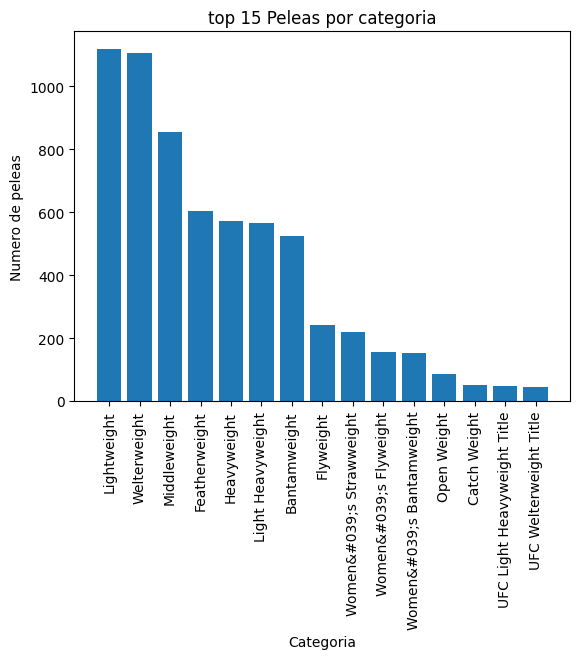

In [18]:
weightClass = df['FIGHT_WEIGHTCLASS'].value_counts()
weightClass = weightClass.head(15)
plt.bar(weightClass.index, weightClass.values)
plt.xlabel('Categoria')
plt.xticks(rotation=90)
plt.ylabel('Numero de peleas')
plt.title('top 15 Peleas por categoria')
plt.show()

<BarContainer object of 5 artists>

Text(0.5, 0, 'Numero de round')

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'Round de finalizacion de las peleas')

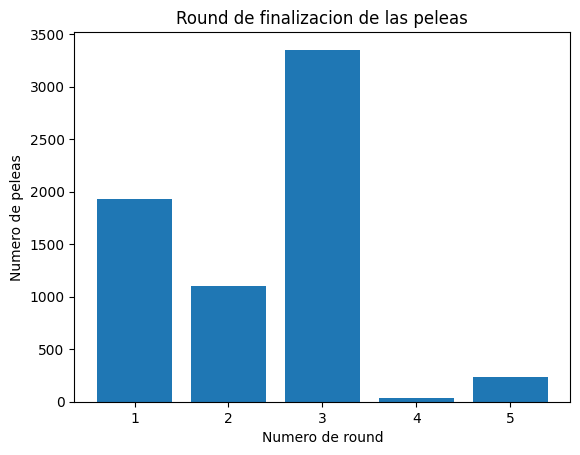

In [19]:
round = df['ROUND'].value_counts()

plt.bar(round.index, round.values)
plt.xlabel('Numero de round')
plt.ylabel('Numero de peleas')
plt.title('Round de finalizacion de las peleas')
plt.show()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Herb Dean'),
  Text(1, 0, 'John McCarthy'),
  Text(2, 0, 'Dan Miragliotta'),
  Text(3, 0, 'Mario Yamasaki'),
  Text(4, 0, 'Marc Goddard'),
  Text(5, 0, 'Chris Tognoni'),
  Text(6, 0, 'Yves Lavigne'),
  Text(7, 0, 'Keith Peterson'),
  Text(8, 0, 'Jason Herzog'),
  Text(9, 0, 'Mark Smith')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Peleas arbitradas')

Text(0.5, 1.0, 'Arbitros con mas peleas')

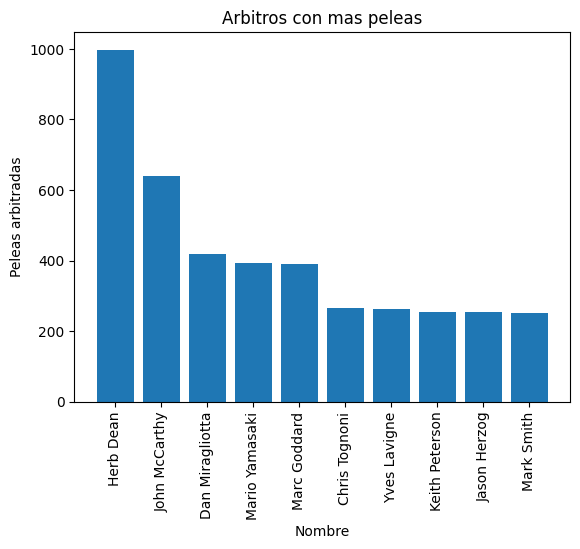

In [20]:
frecuencia = df['FIGHT_REFEREE'].value_counts()
top10Winners = frecuencia.head(10)

plt.bar(top10Winners.index, top10Winners.values)
plt.xticks(rotation=90)

plt.xlabel('Nombre')
plt.ylabel('Peleas arbitradas')
plt.title('Arbitros con mas peleas')

plt.show()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Decision'),
  Text(1, 0, 'Decision - Split'),
  Text(2, 0, 'Punch to Head At Distance'),
  Text(3, 0, 'Rear Naked Choke'),
  Text(4, 0, 'Punches to Head At Distance'),
  Text(5, 0, 'Punches to Head On Ground'),
  Text(6, 0, 'Punch to Head In Clinch'),
  Text(7, 0, 'Kick to Head At Distance'),
  Text(8, 0, 'Punches to Head From Mount'),
  Text(9, 0, 'Punches to Head From Back Control')])

Text(0.5, 0, 'Tipo de victoria')

Text(0, 0.5, 'Cantidad')

Text(0.5, 1.0, 'Victorias mas comunes')

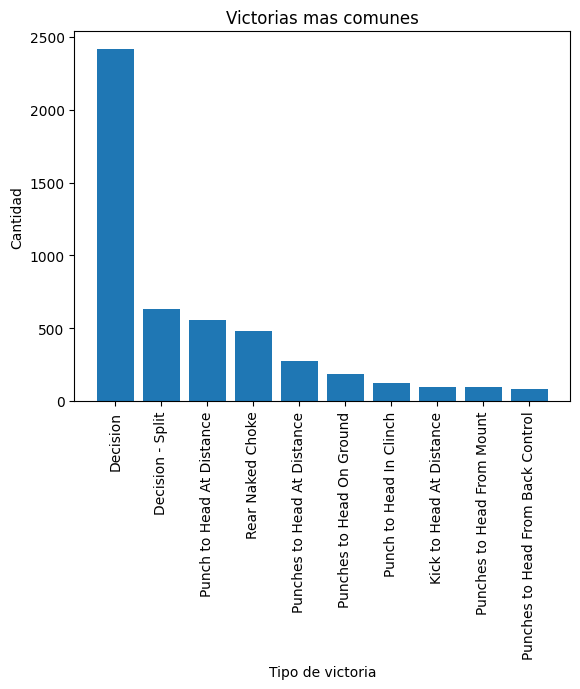

In [21]:
fightDetails = df['FIGHT_DETAILS'].value_counts()
topFightEndUp = fightDetails.head(10)
plt.bar(topFightEndUp.index, topFightEndUp.values)
plt.xticks(rotation=90)

plt.xlabel('Tipo de victoria')
plt.ylabel('Cantidad')
plt.title('Victorias mas comunes')

plt.show()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Jim Miller'),
  Text(1, 0, 'Donald Cerrone'),
  Text(2, 0, 'Demian Maia'),
  Text(3, 0, 'Charles Oliveira'),
  Text(4, 0, 'Jon Jones'),
  Text(5, 0, 'Andrei Arlovski'),
  Text(6, 0, 'Rafael Dos Anjos'),
  Text(7, 0, 'Dustin Poirier'),
  Text(8, 0, 'Georges St-Pierre'),
  Text(9, 0, 'Michael Bisping')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'Peleadores con mas victorias')

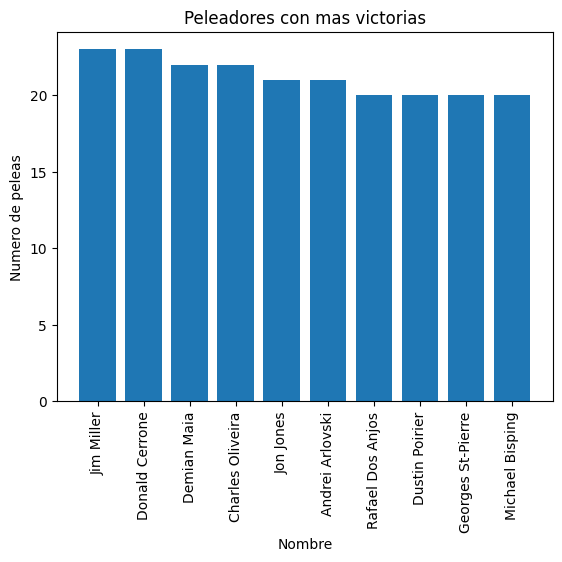

In [22]:
winnerFrequency = df['FIGHT_WINNER'].value_counts()
top_10_modas = winnerFrequency.head(10)

plt.bar(top_10_modas.index, top_10_modas.values)
plt.xticks(rotation=90)
plt.xlabel('Nombre')
plt.ylabel('Numero de peleas')
plt.title('Peleadores con mas victorias')

plt.show()

<BarContainer object of 19 artists>

Text(0.5, 0, 'Formato de pelea')

Text(0, 0.5, 'Peleas con dicho formato')

Text(0.5, 1.0, 'Formato de peleas')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '3 Rnd (5-5-5)'),
  Text(1, 0, '5 Rnd (5-5-5-5-5)'),
  Text(2, 0, '1 Rnd + OT (12-3)'),
  Text(3, 0, 'No Time Limit'),
  Text(4, 0, '3 Rnd + OT (5-5-5-5)'),
  Text(5, 0, '1 Rnd (20)'),
  Text(6, 0, '1 Rnd + 2OT (15-3-3)'),
  Text(7, 0, '2 Rnd (5-5)'),
  Text(8, 0, '1 Rnd (15)'),
  Text(9, 0, '1 Rnd (10)'),
  Text(10, 0, '1 Rnd (12)'),
  Text(11, 0, '1 Rnd + OT (30-5)'),
  Text(12, 0, '1 Rnd (18)'),
  Text(13, 0, '1 Rnd + OT (15-3)'),
  Text(14, 0, '1 Rnd + OT (27-3)'),
  Text(15, 0, '1 Rnd + OT (30-3)'),
  Text(16, 0, '1 Rnd + OT (31-5)'),
  Text(17, 0, '1 Rnd + 2OT (24-3-3)'),
  Text(18, 0, '1 Rnd (30)')])

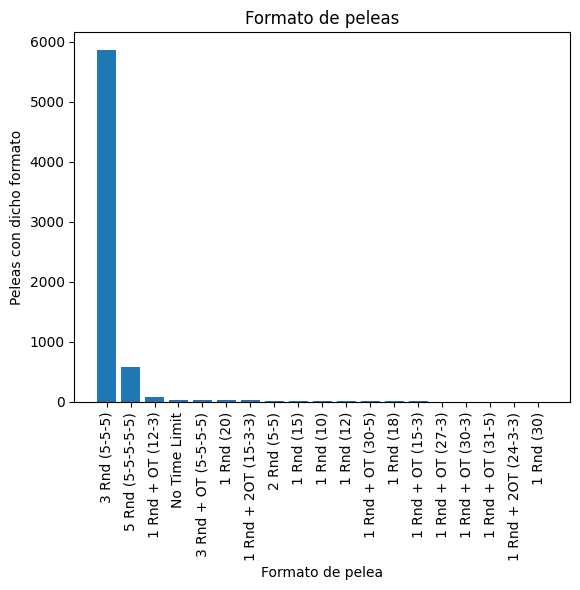

In [23]:
# Si sale en la grafica es que al menos aparece una vez en el dataset
fightFormat = df['FIGHT_TIME_FORMAT'].value_counts()

plt.bar(fightFormat.index, fightFormat.values)
plt.xlabel('Formato de pelea')
plt.ylabel('Peleas con dicho formato')
plt.title('Formato de peleas')
plt.xticks(rotation=90)

plt.show()

**Esto fue hecho por Horacio -|**

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_ID'>

Text(0.5, 1.0, 'Top 10 Peleas basado en el evento')

Text(0.5, 0, 'Event ID')

Text(0, 0.5, 'Numero de Peleas')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1718'),
  Text(1, 0, '1166'),
  Text(2, 0, '1143'),
  Text(3, 0, '1721'),
  Text(4, 0, '1154'),
  Text(5, 0, '1187'),
  Text(6, 0, '1172'),
  Text(7, 0, '1195'),
  Text(8, 0, '1268'),
  Text(9, 0, '1733')])

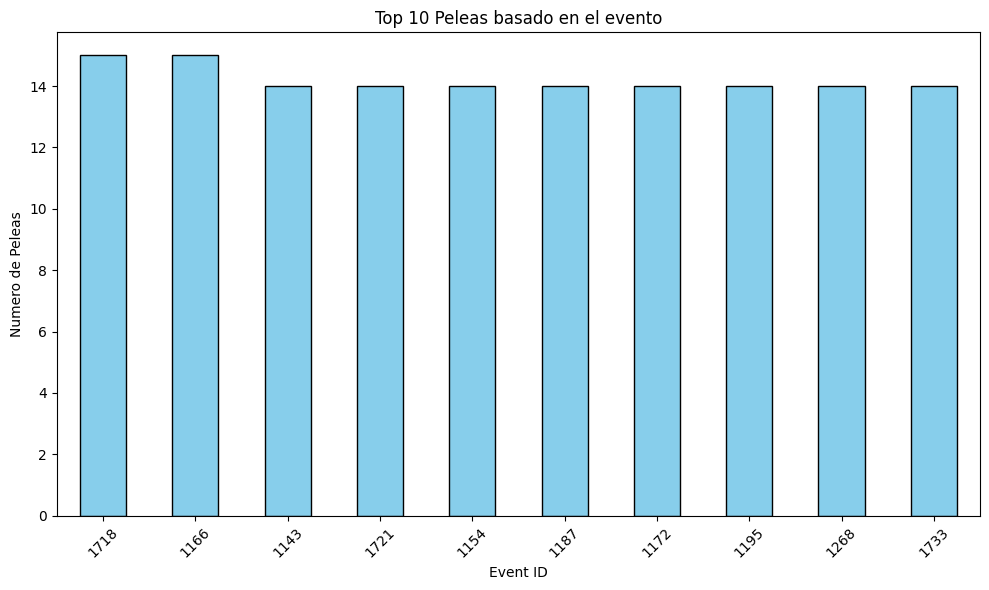

In [52]:
#Es la misma info que FIGHT_ID

event_counts = df['EVENT_ID'].value_counts()


top_10_events = event_counts.head(10)


plt.figure(figsize=(10, 6))
top_10_events.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Peleas basado en el evento')
plt.xlabel('Event ID')
plt.ylabel('Numero de Peleas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FIGHT_NAME'>

Text(0.5, 1.0, ' Frecuencia de Nombre de Pelea')

Text(0.5, 0, 'Nombre de Pelea')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tito Ortiz v Ken Shamrock'),
  Text(1, 0, 'Anthony Pettis v Donald Cerrone'),
  Text(2, 0, 'Don Frye v Mark Hall'),
  Text(3, 0, 'Sabah Homasi v Abdul Razak Alhassan'),
  Text(4, 0, 'Nik Lentz v Charles Oliveira'),
  Text(5, 0, 'Brandon Moreno v Kai Kara-France'),
  Text(6, 0, 'Alex Oliveira v Tim Means'),
  Text(7, 0, 'Phil Davis v Wagner Prado'),
  Text(8, 0, 'Jacare Souza v Chris Camozzi'),
  Text(9, 0, 'Alexander Volkanovski v Max Holloway')])

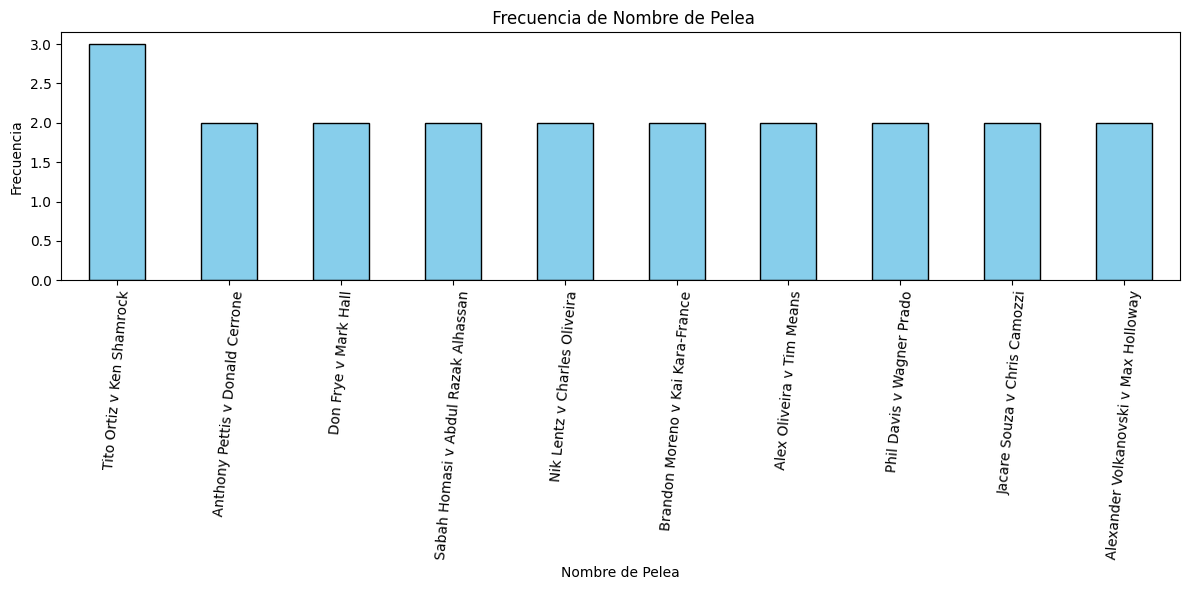

In [74]:


fight_name_counts = df['FIGHT_NAME'].value_counts()

top_10_fight_names = fight_name_counts.head(10)


plt.figure(figsize=(12, 6))
top_10_fight_names.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(' Frecuencia de Nombre de Pelea')
plt.xlabel('Nombre de Pelea')
plt.ylabel('Frecuencia')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FIGHT_METHOD'>

Text(0.5, 1.0, ' Frecuencia de Metodo de Pelea')

Text(0.5, 0, 'Metodo de Pelea')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Decision - Unanimous'),
  Text(1, 0, 'KO/TKO'),
  Text(2, 0, 'Submission'),
  Text(3, 0, 'Decision - Split'),
  Text(4, 0, 'Decision - Majority'),
  Text(5, 0, 'TKO - Doctor&#039;s Stoppage'),
  Text(6, 0, 'Overturned'),
  Text(7, 0, 'Could Not Continue'),
  Text(8, 0, 'DQ'),
  Text(9, 0, 'Other')])

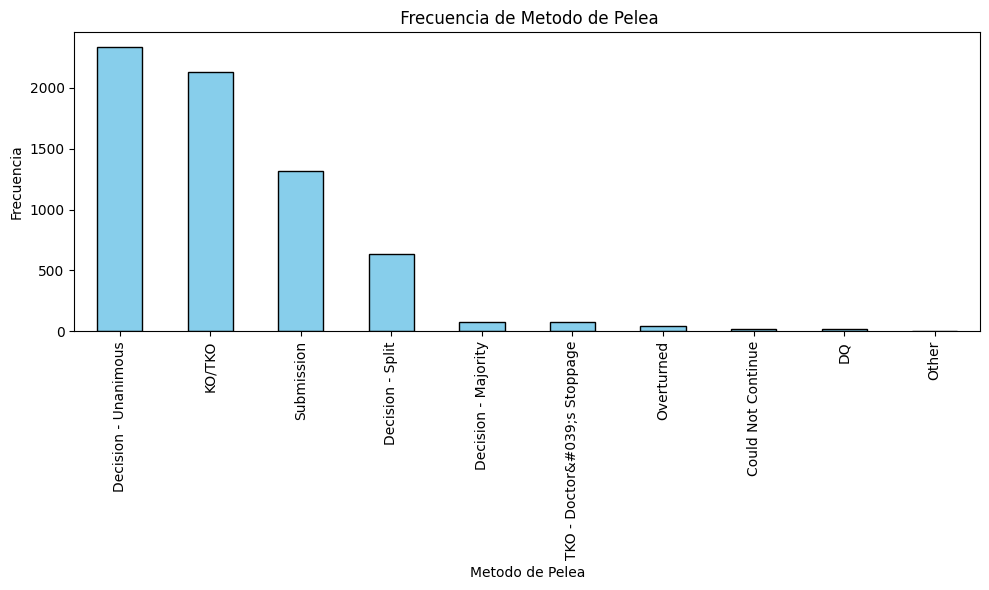

In [73]:
fight_method_counts = df['FIGHT_METHOD'].value_counts()

top_10_fight_method = fight_method_counts.head(15)

plt.figure(figsize=(10, 6))
top_10_fight_method.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(' Frecuencia de Metodo de Pelea')
plt.xlabel('Metodo de Pelea')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_LOCATION'>

Text(0.5, 1.0, 'Top 10 locaciones de eventos ')

Text(0.5, 0, 'Locacion de evento')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Las Vegas, Nevada, USA'),
  Text(1, 0, 'Abu Dhabi, Abu Dhabi, United Arab Emirates'),
  Text(2, 0, 'London, England, United Kingdom'),
  Text(3, 0, 'Anaheim, California, USA'),
  Text(4, 0, 'Houston, Texas, USA'),
  Text(5, 0, 'Newark, New Jersey, USA'),
  Text(6, 0, 'Chicago, Illinois, USA'),
  Text(7, 0, 'Montreal, Quebec, Canada'),
  Text(8, 0, 'Los Angeles, California, USA'),
  Text(9, 0, 'Atlantic City, New Jersey, USA')])

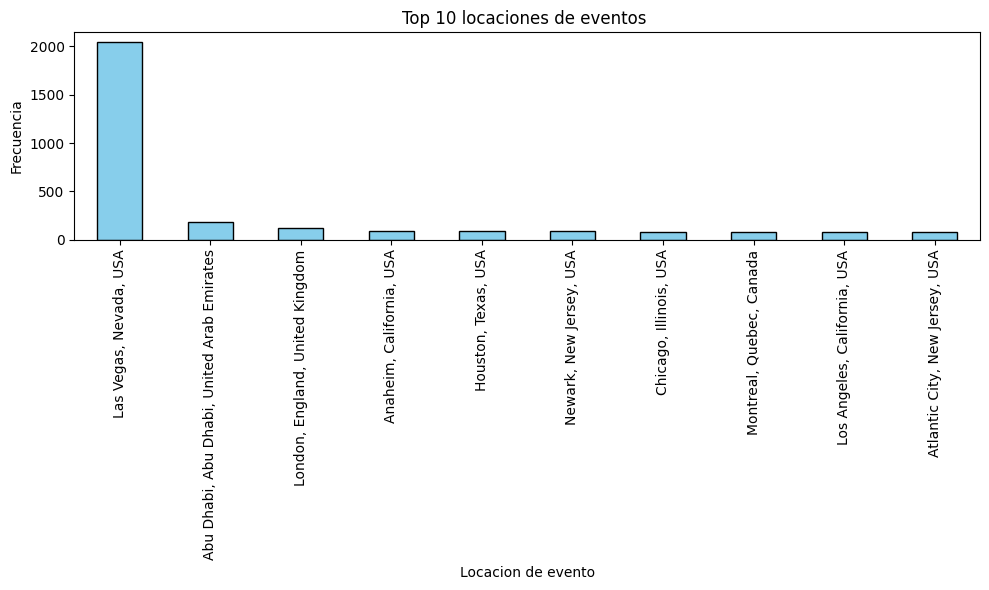

In [75]:
import matplotlib.pyplot as plt

event_location = df['EVENT_LOCATION'].value_counts()

top_10_event_location = event_location.head(10)

plt.figure(figsize=(10, 6))
top_10_event_location.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 locaciones de eventos ')
plt.xlabel('Locacion de evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
###Bayro